# Thực hành 3 : Biến Đổi Hình Học
## 1. Viết chương trình đổi ảnh 
### 1.1 Chọn đối tượng trong ảnh

(1427, 2100, 3)


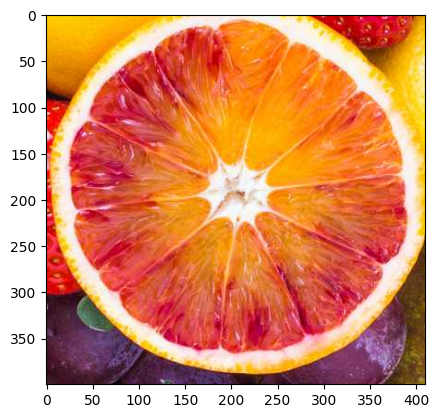

In [3]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt 
data = iio.imread('fruit.jpg')
bmg = data[800:1200, 570:980]
print (data.shape)

iio.imsave('orange.jpg', bmg)
plt.imshow(bmg)
plt.show()

### 1.2 Tịnh tiến đơn

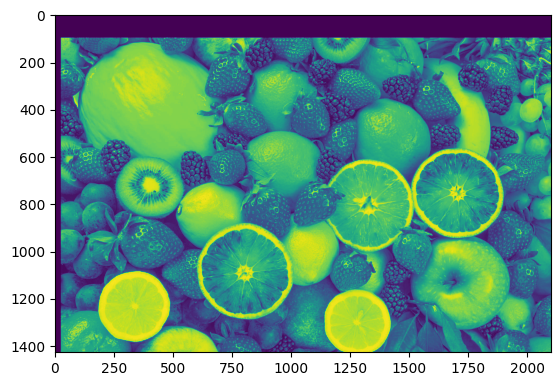

In [3]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt 

data = iio.imread('fruit.jpg', mode='F')
bdata = nd.shift(data, (100,25))

plt.imshow(bdata)
plt.show()

## 1.3 Thay đổi kích thước ảnh 


(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


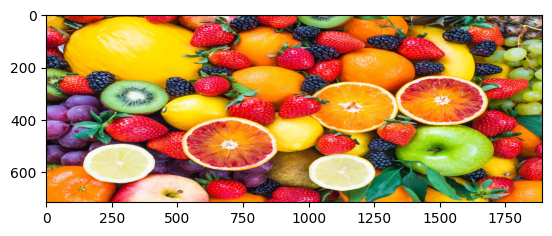

In [5]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh có tên 'fruit.jpg' vào biến 'data'
data = iio.imread('fruit.jpg')
# In ra kích thước (shape) của ảnh gốc
print(data.shape)

# Phóng to ảnh 'data' lên gấp 2 lần theo tất cả các chiều
bdata = nd.zoom(data, 2)
# In ra kích thước của ảnh sau khi phóng to
print(bdata.shape)

# Phóng to ảnh 'data' với các hệ số phóng đại khác nhau cho từng chiều:
# Chiều 1 (chiều cao) phóng đại 2 lần
# Chiều 2 (chiều rộng) phóng đại 2 lần
# Chiều 3 (kênh màu, không thay đổi) phóng đại 1 lần
data2 = nd.zoom(data, (2, 2, 1))
# In ra kích thước của ảnh data2
print(data2.shape)

# Thu nhỏ ảnh 'data' với các hệ số phóng đại khác nhau cho từng chiều:
# Chiều 1 (chiều cao) thu nhỏ 0.5 lần
# Chiều 2 (chiều rộng) thu nhỏ 0.9 lần
# Chiều 3 (kênh màu, không thay đổi) phóng đại 1 lần
data3 = nd.zoom(data, (0.5, 0.9, 1))
# Hiển thị ảnh data3 lên màn hình
plt.imshow(data3)
# Hiển thị cửa sổ chứa ảnh
plt.show()

### 1.4 Xoay ảnh 

(1427, 2100, 3)


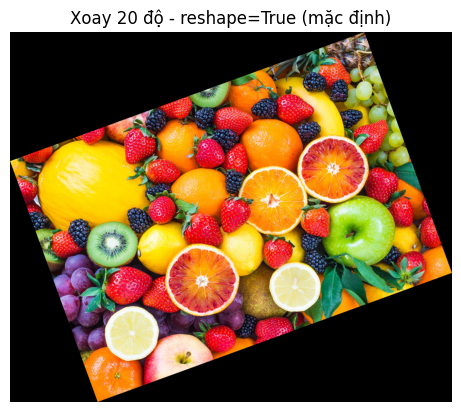

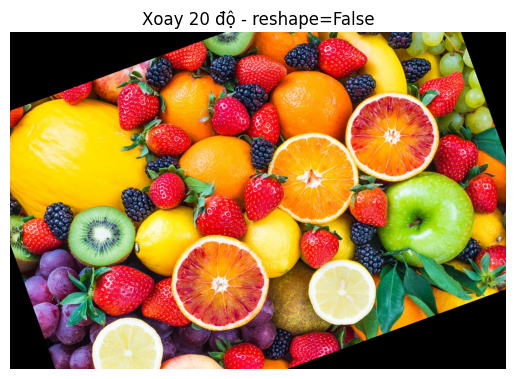

In [4]:
# Nhập các thư viện cần thiết
import numpy as np                             # Xử lý mảng số (dùng cho ảnh)
import scipy.ndimage as nd                     # Thư viện xử lý ảnh (xoay, lọc, ...)
import imageio.v2 as iio                       # Đọc ảnh từ file
import matplotlib.pyplot as plt                # Hiển thị ảnh

# Đọc ảnh từ file 'fruit.jpg'
data = iio.imread('fruit.jpg')

# In kích thước ảnh (height, width, channels)
print(data.shape)

# Xoay ảnh 20 độ, tự động thay đổi kích thước để không bị cắt ảnh
d1 = nd.rotate(data, 20)
plt.imshow(d1)        # Hiển thị ảnh đã xoay
plt.title("Xoay 20 độ - reshape=True (mặc định)")
plt.axis('off')       # Tắt trục tọa độ
plt.show()

# Xoay ảnh 20 độ, giữ nguyên kích thước khung ảnh (ảnh có thể bị cắt)
d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)        # Hiển thị ảnh xoay nhưng không mở rộng kích thước
plt.title("Xoay 20 độ - reshape=False")
plt.axis('off')
plt.show()


### 1.5 Dilation và Erosion

Kích thước ảnh xám: (309, 515)


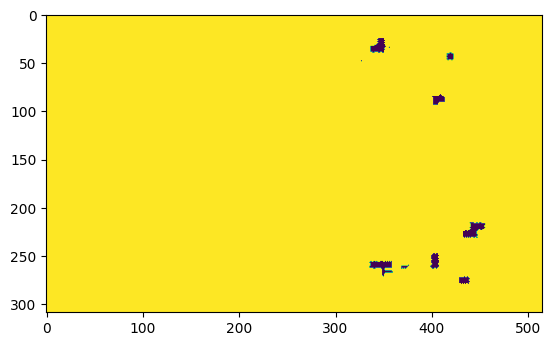

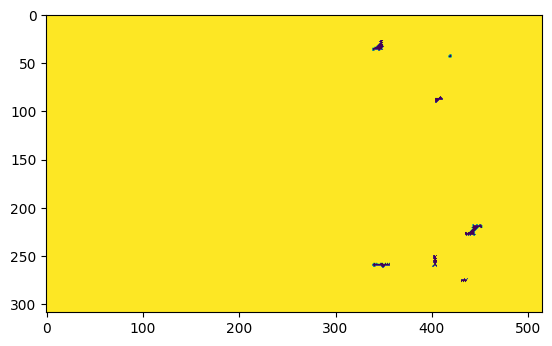

In [41]:
# Nhập các thư viện cần thiết
import numpy as np                             # Thư viện xử lý mảng
import scipy.ndimage as nd                     # Thư viện xử lý ảnh (giãn, co, lọc...)
import imageio.v2 as iio                       # Đọc ảnh
import matplotlib.pylab as plt                 # Hiển thị ảnh

# Đọc ảnh và chuyển sang ảnh xám
data = iio.imread('world_cup.jpg', mode='F')
print("Kích thước ảnh xám:", data.shape)

# Giãn nhị phân 1 lần
d1 = nd.binary_dilation(data)
plt.imshow(d1)
plt.show()

# Giãn nhị phân 3 lần liên tiếp
d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()


### 1.6 Coordinate and Mapping

(309, 515)


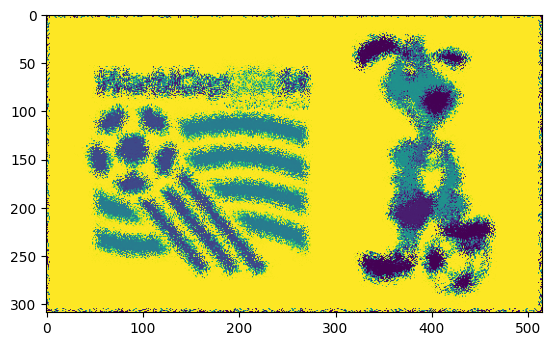

In [12]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('world_cup.jpg', mode="F")
print(data.shape)
V, H = data.shape

M = np.indices((V, H))

d = 5
q = 2 * d * np.random.ranf(M.shape) - d
mp = (M + q).astype(int)
d1 = nd.map_coordinates(data, mp)
plt.imshow(d1)
plt.show()

### 1.7 Biến đổi chung 

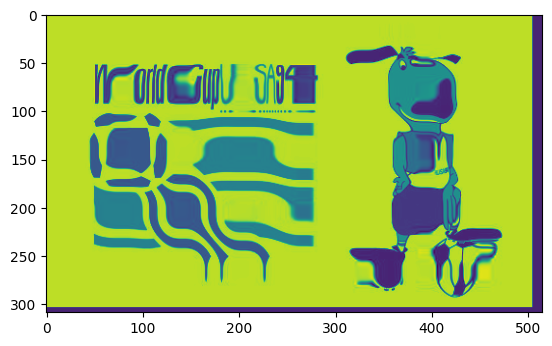

In [13]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
    return a, b

data = iio.imread('world_cup.jpg', mode="F")
d1 = nd.geometric_transform(data, GeoFun)
plt.imshow(d1)
plt.show()

# Bài tập thực hành 

## Bài 1 : 
Chọn ảnh quả kiwi bất kì .
Tịnh tiến quả kiwi 50 pixel sang phải và 30 pixel xuống dưới.
Áp dụng hiệu ứng sóng (wave effect) lên quả kiwi bằng cách sử dụng biến đổi tọa độ (map_coordinates) với hàm sin.
Lưu ảnh kết quả vào file kiwi_wave.jpg

(1427, 2100, 3)


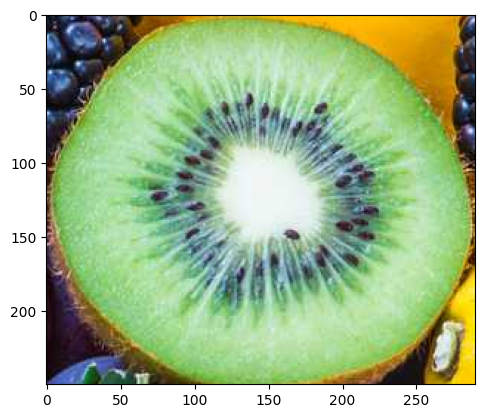

In [59]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt 
data = iio.imread('fruit.jpg')
bmg = data[500:750, 230:520]
print (data.shape)

iio.imsave('kiwi.jpg', bmg)

plt.imshow(bmg)
plt.show()

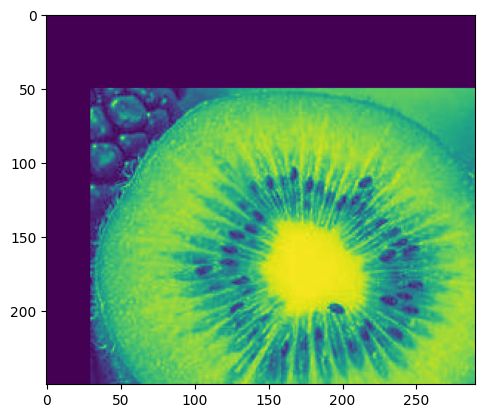

In [26]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt 

data = iio.imread('kiwi.jpg', mode='F')
bdata = nd.shift(data, (50,30))

plt.imshow(bdata)
plt.show()

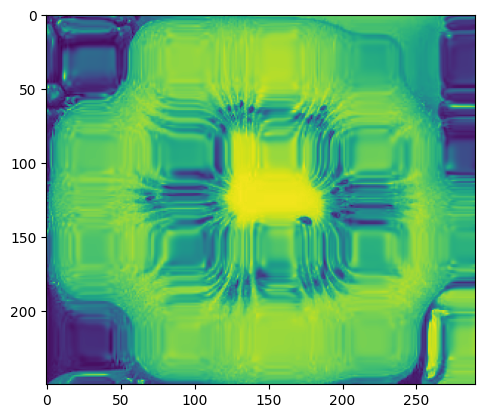

In [40]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

def GeoFun(outcoord):
    a = 10 * np.sin(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.sin(outcoord[1]/10.0) + outcoord[1]
    return a, b

data = iio.imread('kiwi.jpg', mode="F")
d1 = nd.geometric_transform(data, GeoFun)

plt.imshow(d1)
plt.show()

iio.imwrite('kiwi_wave.jpg', d1.astype(np.uint8))

## Bài 2
Chọn quả đu đủ và dưa hấu từ google.
Đổi màu đu đủ thành gradient từ đỏ sang xanh lá, và dưa hấu thành gradient từ vàng sang tím.
Ghép hai quả lên một nền trong suốt (alpha channel) và lưu dưới dạng PNG.
